In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
file = "../scores.csv"

In [3]:
dataframe = pd.read_csv(file)

In [4]:
dataframe

,type,this_iteration_score,best_score_so_far,i,j,timestamp,elapsed_time
0,initial,-3224.166243,-3224.166243,0,NaN,1.762117e+09,0.000940
1,bad candidate,-3348.460899,-3224.166243,0,0.0,1.762117e+09,0.096710
2,good candidate,-3176.092387,-3176.092387,0,1.0,1.762117e+09,0.097748
3,bad candidate,-3337.828641,-3176.092387,0,2.0,1.762117e+09,0.099154
4,bad candidate,-3252.239195,-3176.092387,0,3.0,1.762117e+09,0.100072
...,...,...,...,...,...,...,...
4634,bad candidate,-1804.928757,-1802.746536,4,995.0,1.762117e+09,4.440853
4635,bad candidate,-1892.948480,-1802.746536,4,996.0,1.762117e+09,4.441318
4636,bad candidate,-2080.877820,-1802.746536,4,997.0,1.762117e+09,4.442556
4637,bad candidate,-2033.135212,-1802.746536,4,998.0,1.762117e+09,4.443016


Text(0, 0.5, 'Quad-grams score')

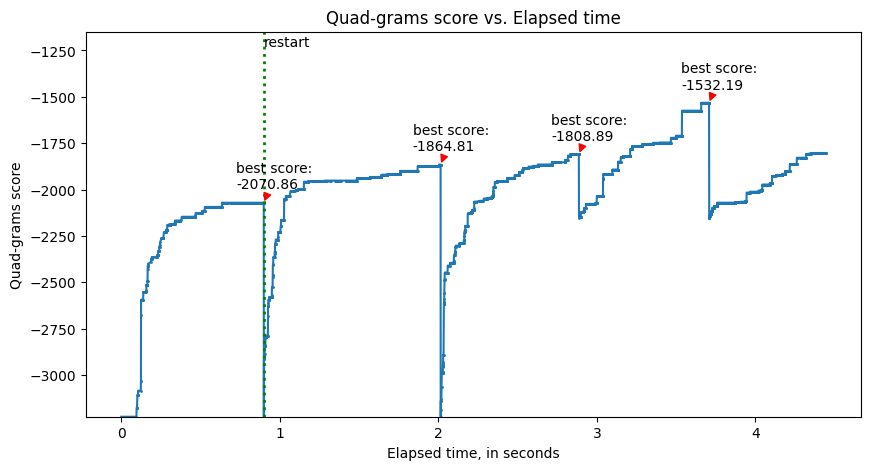

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(dataframe['elapsed_time'], dataframe['best_score_so_far'], marker='o', linestyle='-', markersize=1)

plt.ylim(dataframe['best_score_so_far'].min(), dataframe['best_score_so_far'].max()*.75)
ax = plt.gca()

for lines in dataframe.loc[dataframe.type=="restarting"]["elapsed_time"].values:
    plt.axvline(
        x=lines, 
        color='green', 
        linestyle=':',
        linewidth=2,
        label='Evento B'
    )
    ax.annotate(
        text='restart',
        xy=(lines, dataframe['best_score_so_far'].max()*.8),
    )

for x, y in dataframe.loc[dataframe.type=="really good candidate", ["elapsed_time", "best_score_so_far"]].values:
    ax.annotate(
        text=f'best score:\n{y:.2f}',
        xy=(x, y),
        xytext=(-20, 10),
        textcoords='offset points',
        arrowprops={
            'arrowstyle': 'simple',
            'color': 'red',
        }
    )

plt.title('Quad-grams score vs. Elapsed time')
plt.xlabel('Elapsed time, in seconds')
plt.ylabel('Quad-grams score')
